## 1. Initual Settings

 #### 1.1 Importing the necessary libaries

In [1]:
import pandas as pd
import numpy as np 
import seaborn as sns 
import matplotlib.pyplot as plt 
import matplotlib
plt.style.use('ggplot')

### 1.2 Environment setting

In [2]:
%matplotlib inline
matplotlib.rcParams['figure.figsize'] = (12,8)

### 2. Importing the dataset

In [3]:
# read the data
df= pd.read_csv('sberbank.csv')
#shape and data type 
print(df.shape)
print(df.dtypes)

(30471, 292)
id                      int64
timestamp              object
full_sq                 int64
life_sq               float64
floor                 float64
                       ...   
mosque_count_5000       int64
leisure_count_5000      int64
sport_count_5000        int64
market_count_5000       int64
price_doc               int64
Length: 292, dtype: object


In [4]:
df.head(10)

,id,timestamp,full_sq,life_sq,floor,max_floor,material,build_year,num_room,kitch_sq,...,cafe_count_5000_price_2500,cafe_count_5000_price_4000,cafe_count_5000_price_high,big_church_count_5000,church_count_5000,mosque_count_5000,leisure_count_5000,sport_count_5000,market_count_5000,price_doc
0,1,2011-08-20,43,27.0,4.0,NaN,NaN,NaN,NaN,NaN,...,9,4,0,13,22,1,0,52,4,5850000
1,2,2011-08-23,34,19.0,3.0,NaN,NaN,NaN,NaN,NaN,...,15,3,0,15,29,1,10,66,14,6000000
2,3,2011-08-27,43,29.0,2.0,NaN,NaN,NaN,NaN,NaN,...,10,3,0,11,27,0,4,67,10,5700000
3,4,2011-09-01,89,50.0,9.0,NaN,NaN,NaN,NaN,NaN,...,11,2,1,4,4,0,0,26,3,13100000
4,5,2011-09-05,77,77.0,4.0,NaN,NaN,NaN,NaN,NaN,...,319,108,17,135,236,2,91,195,14,16331452
5,6,2011-09-06,67,46.0,14.0,NaN,NaN,NaN,NaN,NaN,...,62,14,1,53,78,1,20,113,17,9100000
6,7,2011-09-08,25,14.0,10.0,NaN,NaN,NaN,NaN,NaN,...,81,16,3,38,80,1,27,127,8,5500000
7,8,2011-09-09,44,44.0,5.0,NaN,NaN,NaN,NaN,NaN,...,9,4,0,11,18,1,0,47,4,2000000
8,9,2011-09-10,42,27.0,5.0,NaN,NaN,NaN,NaN,NaN,...,19,8,1,18,34,1,3,85,11,5300000
9,10,2011-09-13,36,21.0,9.0,NaN,NaN,NaN,NaN,NaN,...,19,13,0,10,20,1,3,67,1,2000000


In [5]:
### 2.1 Have look at the data header

In [6]:
df_numeric = df.select_dtypes(include=[np.number])
numeric_col = df_numeric.columns.values
print(numeric_col)
print(len(numeric_col))

['id' 'full_sq' 'life_sq' 'floor' 'max_floor' 'material' 'build_year'
 'num_room' 'kitch_sq' 'state' 'area_m' 'raion_popul' 'green_zone_part'
 'indust_part' 'children_preschool' 'preschool_quota'
 'preschool_education_centers_raion' 'children_school' 'school_quota'
 'school_education_centers_raion' 'school_education_centers_top_20_raion'
 'hospital_beds_raion' 'healthcare_centers_raion'
 'university_top_20_raion' 'sport_objects_raion'
 'additional_education_raion' 'culture_objects_top_25_raion'
 'shopping_centers_raion' 'office_raion' 'full_all' 'male_f' 'female_f'
 'young_all' 'young_male' 'young_female' 'work_all' 'work_male'
 'work_female' 'ekder_all' 'ekder_male' 'ekder_female' '0_6_all'
 '0_6_male' '0_6_female' '7_14_all' '7_14_male' '7_14_female' '0_17_all'
 '0_17_male' '0_17_female' '16_29_all' '16_29_male' '16_29_female'
 '0_13_all' '0_13_male' '0_13_female'
 'raion_build_count_with_material_info' 'build_count_block'
 'build_count_wood' 'build_count_frame' 'build_count_brick'
 

In [7]:
# select non numeric columns
df_non_numerics = df.select_dtypes(exclude=[np.number])
df_non_numeric_cols = df_non_numerics.columns.values
print(df_non_numeric_cols)
print(len(df_non_numeric_cols))


['timestamp' 'product_type' 'sub_area' 'culture_objects_top_25'
 'thermal_power_plant_raion' 'incineration_raion' 'oil_chemistry_raion'
 'radiation_raion' 'railroad_terminal_raion' 'big_market_raion'
 'nuclear_reactor_raion' 'detention_facility_raion' 'water_1line'
 'big_road1_1line' 'railroad_1line' 'ecology']
16


## Data Preprocessing

### 3. Dealing with Missing Data

### 3.1 Exploring(Determine)the missing data

### 3.1.1 Heatmap

<AxesSubplot:>

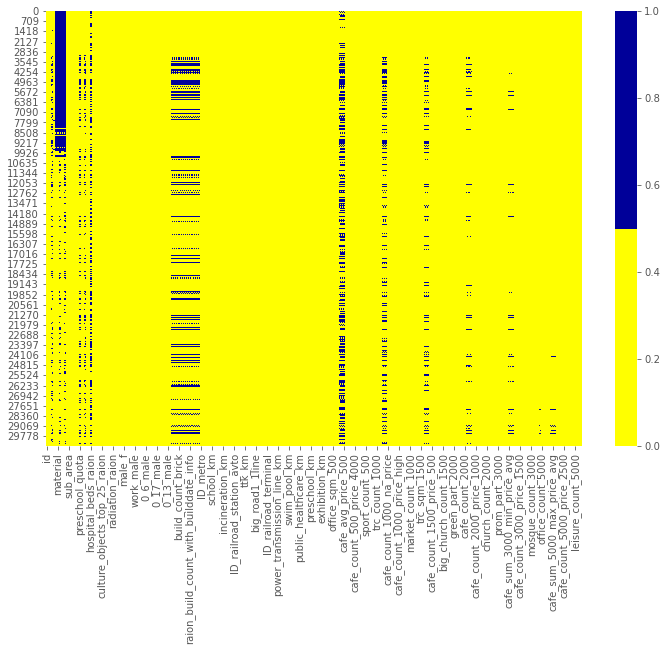

In [8]:
cols = df.columns # first 10 columns
colours = ["#ffff00", "#000099"] # specify the colour - yellow is missing  and  blue is not missing 
sns.heatmap(df[cols].isnull(),cmap = sns.color_palette(colours))

### 3.1.2 Percentage List

In [9]:
# if it's a larger dataset and visualization takes too long can do this.
for col in df.columns:
    pct_missing = np.mean(df[col].isnull())
    print("{} - {}%".format(col, round(pct_missing*100)))

id - 0%
timestamp - 0%
full_sq - 0%
life_sq - 21%
floor - 1%
max_floor - 31%
material - 31%
build_year - 45%
num_room - 31%
kitch_sq - 31%
state - 44%
product_type - 0%
sub_area - 0%
area_m - 0%
raion_popul - 0%
green_zone_part - 0%
indust_part - 0%
children_preschool - 0%
preschool_quota - 22%
preschool_education_centers_raion - 0%
children_school - 0%
school_quota - 22%
school_education_centers_raion - 0%
school_education_centers_top_20_raion - 0%
hospital_beds_raion - 47%
healthcare_centers_raion - 0%
university_top_20_raion - 0%
sport_objects_raion - 0%
additional_education_raion - 0%
culture_objects_top_25 - 0%
culture_objects_top_25_raion - 0%
shopping_centers_raion - 0%
office_raion - 0%
thermal_power_plant_raion - 0%
incineration_raion - 0%
oil_chemistry_raion - 0%
radiation_raion - 0%
railroad_terminal_raion - 0%
big_market_raion - 0%
nuclear_reactor_raion - 0%
detention_facility_raion - 0%
full_all - 0%
male_f - 0%
female_f - 0%
young_all - 0%
young_male - 0%
young_female - 0

### 3.1.3 Histogram

created missing indicator for: life_sq
created missing indicator for: floor
created missing indicator for: max_floor
created missing indicator for: material
created missing indicator for: build_year
created missing indicator for: num_room
created missing indicator for: kitch_sq
created missing indicator for: state
created missing indicator for: preschool_quota
created missing indicator for: school_quota
created missing indicator for: hospital_beds_raion
created missing indicator for: raion_build_count_with_material_info
created missing indicator for: build_count_block
created missing indicator for: build_count_wood
created missing indicator for: build_count_frame
created missing indicator for: build_count_brick
created missing indicator for: build_count_monolith
created missing indicator for: build_count_panel
created missing indicator for: build_count_foam
created missing indicator for: build_count_slag
created missing indicator for: build_count_mix
created missing indicator for: raio

<AxesSubplot:xlabel='index'>

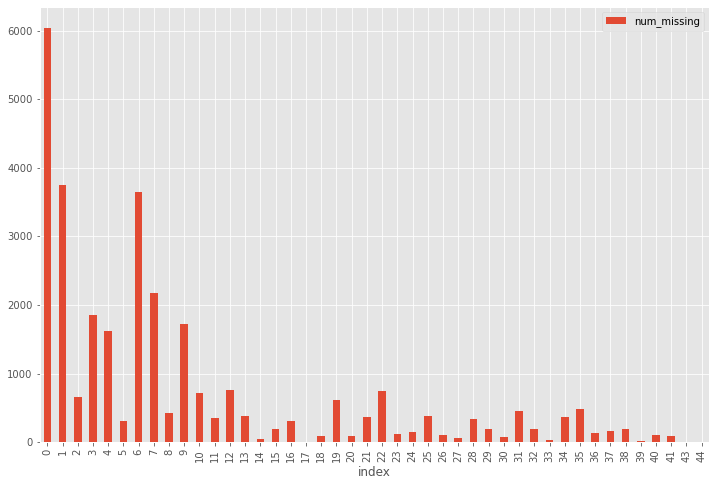

In [10]:
for col in df.columns:
    missing = df[col].isnull()
    num_missing = np.sum(missing)
    #print("{}-{} ".format(col,num_missing))
    if  num_missing >0 :
        print("created missing indicator for: {}".format(col))
        df["{}_ismissing".format(col)] =missing

ismissing_cols = [col for col in df.columns if 'ismissing' in col]
df["num_missing"] = df[ismissing_cols].sum(axis=1)
df["num_missing"].value_counts().reset_index().sort_values(by='index').plot.bar(x='index',y='num_missing')

### 3.2 Recommended Actions

### 3.2.1 Drop the Observation

In [11]:
df.shape
#drop rows with a lot of missing values
ind_missing = df[df['num_missing']>30].index
df_less_missing_rows = df.drop(ind_missing,axis=0)

In [12]:
print(df_less_missing_rows.shape)

(28265, 344)


In [13]:
for col in df_less_missing_rows.columns:
    pct_missing = np.mean(df_less_missing_rows[col].isnull())
    print("{} - {}%".format(col,round(pct_missing * 100)))

id - 0%
timestamp - 0%
full_sq - 0%
life_sq - 18%
floor - 0%
max_floor - 29%
material - 29%
build_year - 42%
num_room - 29%
kitch_sq - 29%
state - 42%
product_type - 0%
sub_area - 0%
area_m - 0%
raion_popul - 0%
green_zone_part - 0%
indust_part - 0%
children_preschool - 0%
preschool_quota - 16%
preschool_education_centers_raion - 0%
children_school - 0%
school_quota - 16%
school_education_centers_raion - 0%
school_education_centers_top_20_raion - 0%
hospital_beds_raion - 43%
healthcare_centers_raion - 0%
university_top_20_raion - 0%
sport_objects_raion - 0%
additional_education_raion - 0%
culture_objects_top_25 - 0%
culture_objects_top_25_raion - 0%
shopping_centers_raion - 0%
office_raion - 0%
thermal_power_plant_raion - 0%
incineration_raion - 0%
oil_chemistry_raion - 0%
radiation_raion - 0%
railroad_terminal_raion - 0%
big_market_raion - 0%
nuclear_reactor_raion - 0%
detention_facility_raion - 0%
full_all - 0%
male_f - 0%
female_f - 0%
young_all - 0%
young_male - 0%
young_female - 0

### 3.2.2 Drop the feature

In [14]:
# Hospital_beds_raion has a lot of missing.
#If we want to drop
cols_to_drop = ['hospital_beds_raion']
df_less_hos_beds_raion = df.drop(cols_to_drop,axis=1)

### 3.2.3 Impute the Missing Data

In [15]:
# replace missing values with the median
med = df['life_sq'].median()
print(med)
df['life_sq'] = df['life_sq'].fillna(med)

30.0


### Moreover, we can apply the same imputation strategy for all the numeric feature al once.

In [16]:
# impute the missing values and create the missing value indicator variables for each numeric columns.
df_numeric = df.select_dtypes(include=[np.number])
numaric_cols = df_numeric.columns.values
for col in numaric_cols:
    missing = df[col].isnull()
    num_missing = np.sum(missing)
    if num_missing > 0:
        print('imputing missing values for {}:'.format(col))
        df['{}_missing'.format(col)] =missing
        med = df[col].median()
        df[col] = df[col].fillna(med)
        

imputing missing values for floor:
imputing missing values for max_floor:
imputing missing values for material:
imputing missing values for build_year:
imputing missing values for num_room:
imputing missing values for kitch_sq:
imputing missing values for state:
imputing missing values for preschool_quota:
imputing missing values for school_quota:
imputing missing values for hospital_beds_raion:
imputing missing values for raion_build_count_with_material_info:
imputing missing values for build_count_block:
imputing missing values for build_count_wood:
imputing missing values for build_count_frame:
imputing missing values for build_count_brick:
imputing missing values for build_count_monolith:
imputing missing values for build_count_panel:
imputing missing values for build_count_foam:
imputing missing values for build_count_slag:
imputing missing values for build_count_mix:
imputing missing values for raion_build_count_with_builddate_info:
imputing missing values for build_count_before_

### Luckily, our dataset has no missing value for our categorical feature. Yet, we can apply the mode imputation strategy for all the feature at once.

In [17]:
#impute the missing values and create the missing value indicator variables for each non-numerical column.
non_numeric =df.select_dtypes(exclude=[np.number])
non_numeric_cols = df_non_numerics.columns.values

for col in non_numeric_cols:
    print("imputing missing values for: {}".format(col))
    df["{}_ismissing".format(col)] = missing
    top = df[col].describe()['top'] # impute with the most frequency value.
    df[col] = df[col].fillna(top)


imputing missing values for: timestamp
imputing missing values for: product_type
imputing missing values for: sub_area
imputing missing values for: culture_objects_top_25
imputing missing values for: thermal_power_plant_raion
imputing missing values for: incineration_raion
imputing missing values for: oil_chemistry_raion
imputing missing values for: radiation_raion
imputing missing values for: railroad_terminal_raion
imputing missing values for: big_market_raion
imputing missing values for: nuclear_reactor_raion
imputing missing values for: detention_facility_raion
imputing missing values for: water_1line
imputing missing values for: big_road1_1line
imputing missing values for: railroad_1line
imputing missing values for: ecology


### 3.2.4 Replace the Missing Data Points

In [18]:
#categorical
df['sub_area'] = df['sub_area'].fillna('_MISSING_')

# numeric
df['life_sq'] = df['life_sq'].fillna(-999)


### 4.Dealing with irregular data (Outliers)


### 4.1 Determining the outliers

### 4.1.1 Histogram/Box plot

<AxesSubplot:>

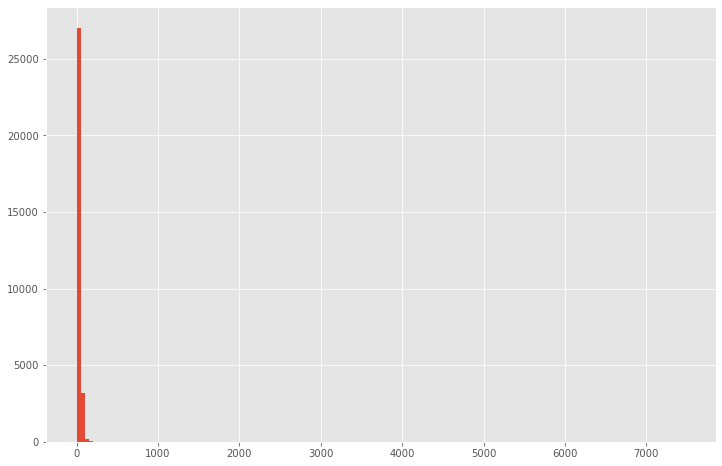

In [19]:
# histogram of life_sq.
df['life_sq'].hist(bins=150)

<AxesSubplot:>

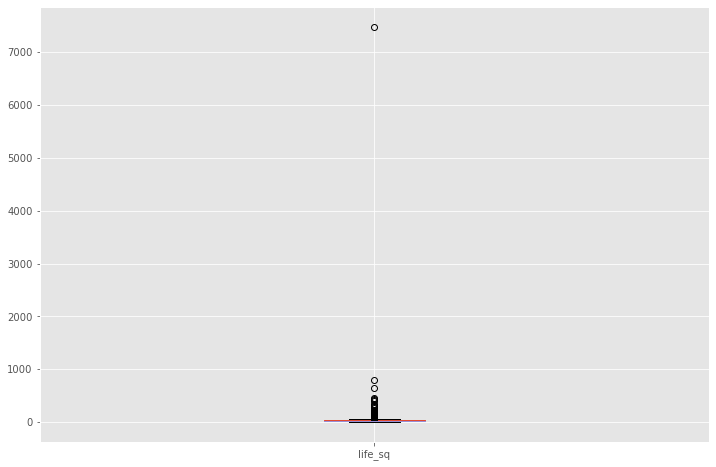

In [20]:
# box plot
df.boxplot(column=['life_sq'])

### 4.1.2 Descriptive Statistics

In [21]:
df['life_sq'].describe()

count    30471.000000
mean        33.480883
std         46.522251
min          0.000000
25%         22.000000
50%         30.000000
75%         38.000000
max       7478.000000
Name: life_sq, dtype: float64

### 4.1.3 Bar Chart

<AxesSubplot:>

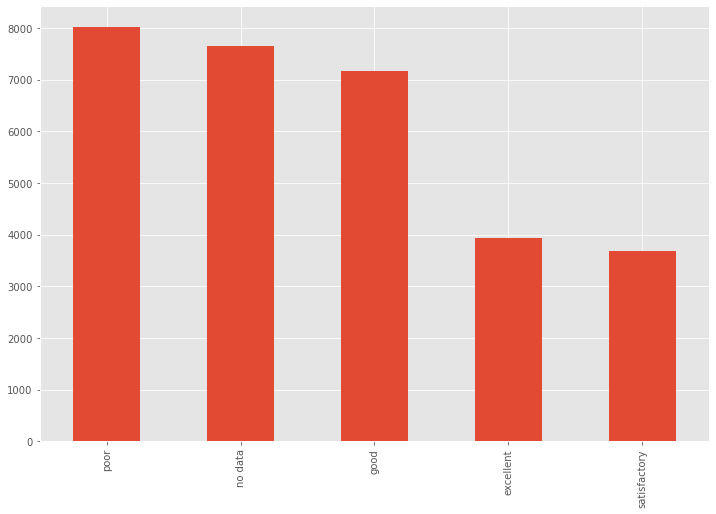

In [22]:
# bar chart - distribution of categorical variable
df['ecology'].value_counts().plot.bar()

In [23]:
df.head(5)

,id,timestamp,full_sq,life_sq,floor,max_floor,material,build_year,num_room,kitch_sq,...,oil_chemistry_raion_ismissing,radiation_raion_ismissing,railroad_terminal_raion_ismissing,big_market_raion_ismissing,nuclear_reactor_raion_ismissing,detention_facility_raion_ismissing,water_1line_ismissing,big_road1_1line_ismissing,railroad_1line_ismissing,ecology_ismissing
0,1,2011-08-20,43,27.0,4.0,12.0,1.0,1979.0,2.0,6.0,...,False,False,False,False,False,False,False,False,False,False
1,2,2011-08-23,34,19.0,3.0,12.0,1.0,1979.0,2.0,6.0,...,False,False,False,False,False,False,False,False,False,False
2,3,2011-08-27,43,29.0,2.0,12.0,1.0,1979.0,2.0,6.0,...,False,False,False,False,False,False,False,False,False,False
3,4,2011-09-01,89,50.0,9.0,12.0,1.0,1979.0,2.0,6.0,...,False,False,False,False,False,False,False,False,False,False
4,5,2011-09-05,77,77.0,4.0,12.0,1.0,1979.0,2.0,6.0,...,False,False,False,False,False,False,False,False,False,False


# Assignment

1. Today’s date and time in different formats (Eg. Friday 12/02/2021)

In [24]:
from datetime import date , datetime


In [25]:
today = date.today()
today_date = today.strftime("%A %Y-%m-%d")
print(today_date)

Wednesday 2021-02-17


2. String to date conversion (Eg. '2021-02-12 8:00PM‘ to 2021-02-12 20:00:00)

In [37]:
from datetime import *
from dateutil import parser 
timestamp = '2015-01-02 8:00 PM'
t= parser.parse(timestamp)
#m2 = datetime.strptime(t,'%Y-%d-%m %H:%M')
#m2 = datetime.strptime(timestamp, '%I:%M %p')
print(type(t))
print(t)

<class 'datetime.datetime'>
2015-01-02 20:00:00


In [29]:
# In below cell i'm going to convert "timestamp" column, into "<class 'datetime.datetime'>" format. 

In [38]:
#convert "timestamp" field into an array.
df_date = df["timestamp"].values

In [39]:
time_obj = [datetime.strptime(d,'%Y-%m-%d') for d in df_date]

In [42]:
#time_obj

3. Difference in datetime calculation ( Eg. 2/01/2021 and today , Your Age) 

In [48]:
date_of_birth = "1997-07-18"
date_of_birth_obj = datetime.strptime(date_of_birth,'%Y-%m-%d')

In [78]:
age=   datetime.now() - date_of_birth_obj 
age.total_seconds()/3.154e+7

23.601675831653328

4.  Datetime plus/minus a certain period of time (Eg. today + 1.7 years)

In [86]:
from datetime import datetime, timedelta
now = datetime.now()
print("todays date: " , str(now))
#add 1.7 year to current date
yr = timedelta(days=365)
future_date = now+(yr*1.7)
print('date after 1.7 year:', future_date)

todays date:  2021-02-17 17:26:07.426972
date after 1.7 year: 2022-10-31 05:26:07.426972
